<a href="https://colab.research.google.com/github/AldoF95/diplomski_rad_masters_thesis/blob/main/intent_recognition_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow_text
!pip install --upgrade matplotlib

# Data loading

In [ ]:
import tensorflow as tf
#import tensorflow_text as tft
import tensorflow_hub as tfh
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/chatbot-data.xlsx')

In [ ]:
#text preprocessor for bert based models
preprocessor = tfh.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2')
#Language Agnostic BERT sentence encoder
model = tfh.KerasLayer('https://tfhub.dev/google/LaBSE/2')

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tekst_pitanja          208 non-null    object
 1   vrsta_akcije           208 non-null    object
 2   namjera                208 non-null    object
 3   namjera_02             208 non-null    object
 4   eng_google_translator  208 non-null    object
 5   eng_human_translation  208 non-null    object
dtypes: object(6)
memory usage: 9.9+ KB


In [ ]:
#text -> hrvatski text
#action -> vrsta akcije (ne koristim ovdje)
#intent -> 3 classes of intents
#g_translation -> translation hr->eng using google translator
#h_translation -> translation hr->eng manualy   
columns = ['text', 'action', 'intent','intent02', 'g_translation', 'h_translation']
data.columns = columns

In [ ]:
#creating out of domain category
data['intent'][data['intent']=='studomat_problemi'] = 'OOD'
data['intent'][data['intent']=='status_studenta'] = 'OOD'

In [ ]:
data['intent'] = data['intent'].astype('category')
data['intent_codes'] = data['intent'].cat.codes

In [ ]:
values = data['intent'].value_counts()
plt.stem(values)

# Analisys

In [ ]:
import seaborn as sns

In [ ]:
colorname = []
colorid = []
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

zippedcolors = list(zip(colorname, colorid))
zippedcolors = sorted(zippedcolors, key=lambda x: x[1])
zippedcolors

[('black', '#000000'),
 ('navy', '#000080'),
 ('darkblue', '#00008B'),
 ('mediumblue', '#0000CD'),
 ('blue', '#0000FF'),
 ('darkgreen', '#006400'),
 ('green', '#008000'),
 ('teal', '#008080'),
 ('darkcyan', '#008B8B'),
 ('deepskyblue', '#00BFFF'),
 ('darkturquoise', '#00CED1'),
 ('mediumspringgreen', '#00FA9A'),
 ('lime', '#00FF00'),
 ('springgreen', '#00FF7F'),
 ('aqua', '#00FFFF'),
 ('cyan', '#00FFFF'),
 ('midnightblue', '#191970'),
 ('dodgerblue', '#1E90FF'),
 ('lightseagreen', '#20B2AA'),
 ('forestgreen', '#228B22'),
 ('seagreen', '#2E8B57'),
 ('darkslategray', '#2F4F4F'),
 ('darkslategrey', '#2F4F4F'),
 ('limegreen', '#32CD32'),
 ('mediumseagreen', '#3CB371'),
 ('turquoise', '#40E0D0'),
 ('royalblue', '#4169E1'),
 ('steelblue', '#4682B4'),
 ('darkslateblue', '#483D8B'),
 ('mediumturquoise', '#48D1CC'),
 ('indigo', '#4B0082'),
 ('darkolivegreen', '#556B2F'),
 ('cadetblue', '#5F9EA0'),
 ('cornflowerblue', '#6495ED'),
 ('rebeccapurple', '#663399'),
 ('mediumaquamarine', '#66CDAA'),
 

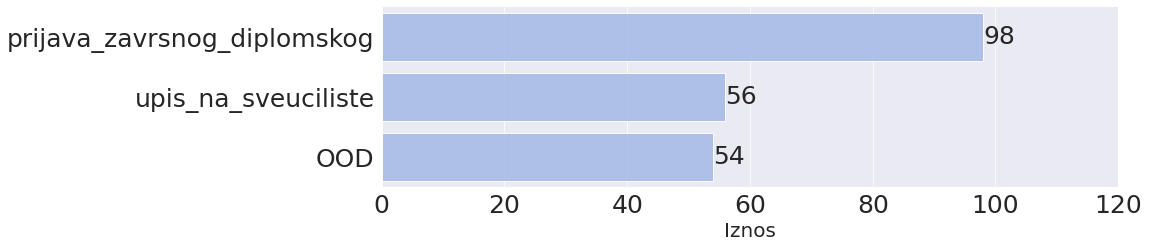

In [ ]:
font_s = 25
sns.set_style("darkgrid")
hist = sns.catplot(y="intent", 
                   kind="count", 
                   color="#9DB9F1",
                   alpha=0.9,
                   data=data,
                   order=data['intent'].value_counts().index)
hist.fig.set_size_inches(20, 2.8)
hist.set_xticklabels(fontsize=font_s)
hist.set_yticklabels(fontsize=font_s)

hist.set(xlabel="Iznos", ylabel=None)
hist.set_xlabels(label='Iznos', fontsize=font_s-5)
#hist.fig.suptitle("Distribucija namjera Grupa_1", fontsize=font_s+2, y=1.1)

ax = hist.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_width())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=font_s)

In [ ]:
data_cp = data

In [ ]:
data_cp['no_space'] = data_cp['text'].str.replace(" ", '')

In [ ]:
data_cp['no_space_eng'] = data_cp['g_translation'].str.replace(" ", '')
data_cp['no_space_hum'] = data_cp['h_translation'].str.replace(" ", '')

In [ ]:
data_cp['tokens'] = data_cp['text'].str.split(" ")

In [ ]:
data_cp['tokens_eng'] = data_cp['g_translation'].str.split(" ")
data_cp['tokens_hum'] = data_cp['h_translation'].str.split(" ")

In [ ]:
data_cp['tokens_len'] = data_cp['tokens'].str.len()
data_cp['tokens_len_eng'] = data_cp['tokens_eng'].str.len()
data_cp['tokens_len_hum'] = data_cp['tokens_hum'].str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0.0, 0, '0.0'),
 Text(2.5, 0, '2.5'),
 Text(5.0, 0, '5.0'),
 Text(7.5, 0, '7.5'),
 Text(10.0, 0, '10.0'),
 Text(12.5, 0, '12.5'),
 Text(15.0, 0, '15.0'),
 Text(17.5, 0, '17.5'),
 Text(20.0, 0, '20.0')]

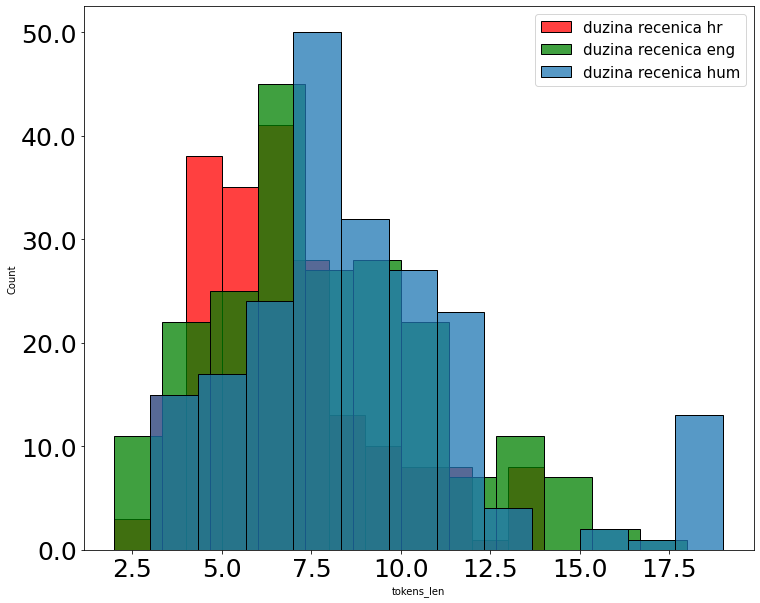

In [ ]:
font_s = 25
fig, ax = plt.subplots(figsize=(12, 10))
h = sns.histplot(data=data_cp, x='tokens_len', color="red", ax=ax, label="duzina recenica hr")
h = sns.histplot(data=data_cp, x='tokens_len_eng',color="green", ax=ax, label="duzina recenica eng")
h = sns.histplot(data=data_cp, x='tokens_len_hum', ax=ax, label="duzina recenica hum")
plt.legend(prop={'size': font_s-10})
h.set_yticklabels(h.get_yticks(), size = font_s)
h.set_xticklabels(h.get_xticks(), size = font_s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'Ručni prijevod')

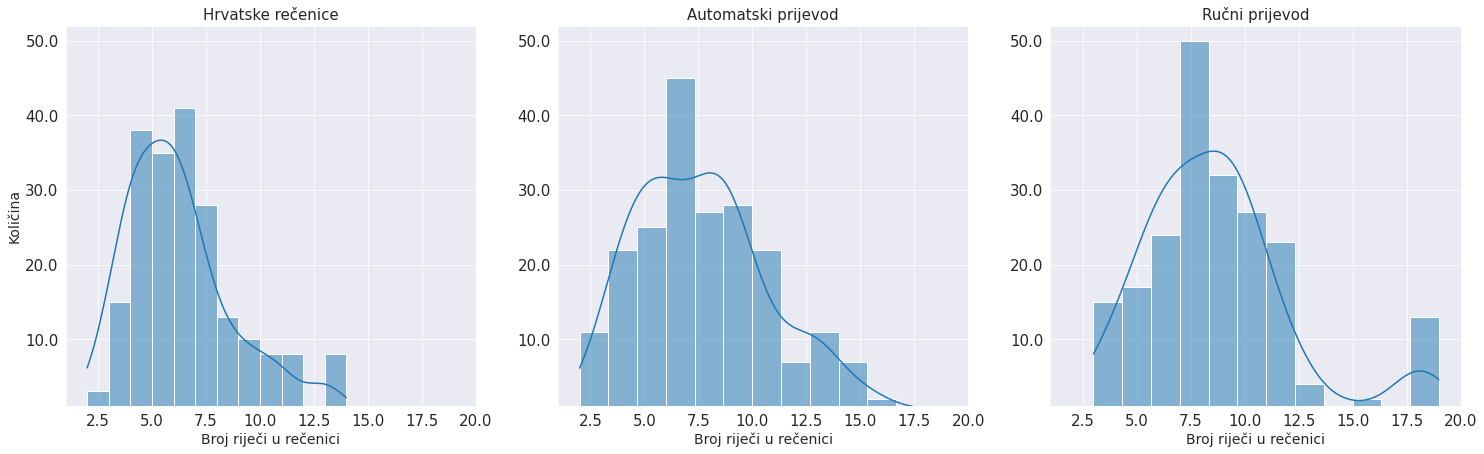

In [ ]:
font_s = 15
#fig, ax = plt.subplots(1, 3, figsize=(25, 7), sharex=True, sharey=True)
fig, ax = plt.subplots(1, 3, figsize=(25, 7))
sns.set_style("darkgrid")
hr = sns.histplot(data=data_cp, x='tokens_len', kde=True, ax=ax[0], label="duzina recenica hr")
g = sns.histplot(data=data_cp, x='tokens_len_eng', ax=ax[1], kde=True, label="duzina recenica eng")
tr = sns.histplot(data=data_cp, x='tokens_len_hum', ax=ax[2], kde=True, label="duzina recenica hum")
hr.set_yticklabels(h.get_yticks(), size = font_s)
hr.set_xticklabels(h.get_xticks(), size = font_s)
hr.set_ylim((1, 52))
hr.set_xlim((1, 20))
hr.set_xlabel("Broj riječi u rečenici", size=font_s-1)
hr.set_ylabel('Količina', size=font_s-1)
hr.set_title('Hrvatske rečenice', size=font_s)

g.set_yticklabels(h.get_yticks(), size = font_s)
g.set_xticklabels(h.get_xticks(), size = font_s)
g.set_ylim((1, 52))
g.set_xlim((1, 20))
g.set_xlabel("Broj riječi u rečenici", size=font_s-1)
g.set_ylabel(None)
g.set_title('Automatski prijevod', size=font_s)

tr.set_yticklabels(h.get_yticks(), size = font_s)
tr.set_xticklabels(h.get_xticks(), size = font_s)
tr.set_ylim((1, 52))
tr.set_xlim((1, 20))
tr.set_xlabel("Broj riječi u rečenici", size=font_s-1)
tr.set_ylabel(None)
tr.set_title('Ručni prijevod', size=font_s)

In [ ]:
avg_len = data_cp['tokens_len'].sum()/data_cp.shape[0]
avg_len_eng = data_cp['tokens_len_eng'].sum()/data_cp.shape[0]
avg_len_hum = data_cp['tokens_len_hum'].sum()/data_cp.shape[0]

In [ ]:
(avg_len_eng-avg_len)/avg_len

0.23710546574287916

In [ ]:
(avg_len_hum-avg_len)/avg_len

0.3933795227097768

In [ ]:
avg_len_hum

8.701923076923077

# Train - Validation split

In [ ]:
codes = data['intent_codes'].unique()

In [ ]:
#train - validation split
#TODO fixed validation split
validation_data = pd.DataFrame(columns=data.columns)
train_data = pd.DataFrame(columns=data.columns)
for c in codes:
  sample = data[data['intent_codes']==c]
  sample = sample.sample(frac=1)
  val = sample.sample(frac=0.25)
  train = pd.concat([sample, val]).drop_duplicates(keep=False)
  validation_data = validation_data.append(val, ignore_index=True)
  train_data = train_data.append(train, ignore_index=True)

In [ ]:
validation_data['intent'].value_counts()

prijava_zavrsnog_diplomskog    24
upis_na_sveuciliste            14
OOD                            14
Name: intent, dtype: int64

In [ ]:
train_data['intent'].value_counts()

prijava_zavrsnog_diplomskog    74
upis_na_sveuciliste            42
OOD                            40
Name: intent, dtype: int64

# Split by language and dataframe to dataset transformation

In [ ]:
train_data.head()

,text,action,intent,g_translation,h_translation,intent_codes
0,"zavrsio sam preddiplomski racunalstva na feru,...",static_faq,upis_na_sveuciliste,"I ended up undergraduate computing in Fer, can...","I am an undergraduate of informatics at FER, c...",2
1,"Pozdrav, ja sam Ana, htjela bi se upisati.",pokreni_proces,upis_na_sveuciliste,"Hello, I am Ana, wanted to enroll.","Hello, I am Ana, I would like to enroll to the...",2
2,"ako sam zavrsio preddiplomski u inozemstvu, mo...",static_faq,upis_na_sveuciliste,"If I finished undergraduate abroad, I can ente...","if I am an undergraduated abroad, can I enroll...",2
3,ako sam zavrsio preddiplomski studij knjizevno...,static_faq,upis_na_sveuciliste,If I finished undergraduate literature studies...,"if I graduated from literature program, can I ...",2
4,Rečeno mi je da se javim za provedbu upisa,pokreni_proces,upis_na_sveuciliste,I was told to report to enforcement,I was told to come here for the enrollment,2


In [ ]:
#google translation data
train_data_eng = train_data[['g_translation', 'intent_codes']]
validation_data_eng = validation_data[['g_translation', 'intent_codes']]
train_data_eng.columns = ['text', 'intent_codes']
validation_data_eng.columns = ['text', 'intent_codes']
#croatian data
train_data_hr = train_data[['text', 'intent_codes']]
validation_data_hr = validation_data[['text', 'intent_codes']]
train_data_hr.columns = ['text', 'intent_codes']
validation_data_hr.columns = ['text', 'intent_codes']
#human translation data
train_data_human = train_data[['h_translation', 'intent_codes']]
validation_data_human = validation_data[['h_translation', 'intent_codes']]
train_data_human.columns = ['text', 'intent_codes']
validation_data_human.columns = ['text', 'intent_codes']
#google translation + croatian data
train_data_eng_hr = train_data_eng.append(train_data_hr, ignore_index = True)
validation_data_eng_hr = validation_data_eng.append(validation_data_hr, ignore_index = True)

#human translation + croatian data
train_data_human_hr = train_data_human.append(train_data_hr, ignore_index = True)
validation_data_human_hr = validation_data_human.append(validation_data_hr, ignore_index = True)


In [ ]:
def df_to_dataset(df, shuffle=True, batch_size=16):
  df = df.copy()
  labels = df.pop('intent_codes')
  lables_cat = tf.keras.utils.to_categorical(labels, 3)
  dataset = tf.data.Dataset.from_tensor_slices((dict(df), lables_cat))
  if shuffle:
    dataset = dataset.shuffle(buffer_size=len(df))
  dataset = dataset.batch(batch_size).prefetch(batch_size)
  return dataset

In [ ]:
train_data_eng = df_to_dataset(train_data_eng)
validation_data_eng = df_to_dataset(validation_data_eng)

train_data_hr = df_to_dataset(train_data_hr)
validation_data_hr = df_to_dataset(validation_data_hr)

train_data_human = df_to_dataset(train_data_human)
validation_data_human = df_to_dataset(validation_data_human)

train_data_eng_hr = df_to_dataset(train_data_eng_hr)
validation_data_eng_hr = df_to_dataset(validation_data_eng_hr)

train_data_human_hr = df_to_dataset(train_data_human_hr)
validation_data_human_hr = df_to_dataset(validation_data_human_hr)

# Model

In [ ]:
def model_build():
  inputs = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoded_input = preprocessor(inputs)
  encoder_outputs = model(encoded_input)
  x = encoder_outputs['pooled_output']
  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.7)(x)
  outputs = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(x)
  return tf.keras.Model(inputs, outputs)

In [ ]:
#MODEL ENG
model_eng = model_build()
model_eng.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_history = model_eng.fit(
    train_data_eng,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_eng
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 102s 9s/step - loss: 1.0197 - categorical_accuracy: 0.5449 - val_loss: 0.6367 - val_categorical_accuracy: 0.7885
Epoch 2/5
10/10 [==============================] - 91s 9s/step - loss: 0.5862 - categorical_accuracy: 0.7628 - val_loss: 0.4268 - val_categorical_accuracy: 0.8846
Epoch 3/5
10/10 [==============================] - 91s 9s/step - loss: 0.3925 - categorical_accuracy: 0.8718 - val_loss: 0.3505 - val_categorical_accuracy: 0.8846
Epoch 4/5
10/10 [==============================] - 90s 9s/step - loss: 0.3324 - categorical_accuracy: 0.8910 - val_loss: 0.3069 - val_categorical_accuracy: 0.8846
Epoch 5/5
10/10 [==============================] - 90s 9s/step - loss: 0.2325 - categorical_accuracy: 0.9359 - val_loss: 0.2861 - val_categorical_accuracy: 0.8654


In [ ]:
#MODEL HR
model_hr = model_build()
model_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

hr_history = model_hr.fit(
    train_data_hr,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_hr
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 94s 9s/step - loss: 1.2266 - categorical_accuracy: 0.4295 - val_loss: 0.7046 - val_categorical_accuracy: 0.7500
Epoch 2/5
10/10 [==============================] - 91s 9s/step - loss: 0.6923 - categorical_accuracy: 0.7051 - val_loss: 0.4885 - val_categorical_accuracy: 0.8654
Epoch 3/5
10/10 [==============================] - 90s 9s/step - loss: 0.4587 - categorical_accuracy: 0.8526 - val_loss: 0.4047 - val_categorical_accuracy: 0.8462
Epoch 4/5
10/10 [==============================] - 90s 9s/step - loss: 0.3530 - categorical_accuracy: 0.8654 - val_loss: 0.3430 - val_categorical_accuracy: 0.8846
Epoch 5/5
10/10 [==============================] - 91s 9s/step - loss: 0.2896 - categorical_accuracy: 0.9103 - val_loss: 0.2947 - val_categorical_accuracy: 0.8462


In [ ]:
#MODEL HUMAN
model_human = model_build()
model_human.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_history = model_human.fit(
    train_data_human,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_human
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 101s 9s/step - loss: 1.1208 - categorical_accuracy: 0.4872 - val_loss: 0.4665 - val_categorical_accuracy: 0.9615
Epoch 2/5
10/10 [==============================] - 91s 9s/step - loss: 0.5783 - categorical_accuracy: 0.8077 - val_loss: 0.3013 - val_categorical_accuracy: 0.9231
Epoch 3/5
10/10 [==============================] - 90s 9s/step - loss: 0.3756 - categorical_accuracy: 0.8590 - val_loss: 0.1999 - val_categorical_accuracy: 0.9808
Epoch 4/5
10/10 [==============================] - 91s 9s/step - loss: 0.2441 - categorical_accuracy: 0.9167 - val_loss: 0.1543 - val_categorical_accuracy: 0.9808
Epoch 5/5
10/10 [==============================] - 90s 9s/step - loss: 0.2252 - categorical_accuracy: 0.9295 - val_loss: 0.1327 - val_categorical_accuracy: 0.9808


In [ ]:
#MODEL ENG+HR
model_eng_hr = model_build()
model_eng_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_hr_history = model_eng_hr.fit(
    train_data_eng_hr,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_eng_hr
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


20/20 [==============================] - 184s 9s/step - loss: 1.0611 - categorical_accuracy: 0.5385 - val_loss: 0.4522 - val_categorical_accuracy: 0.9423
Epoch 2/5
20/20 [==============================] - 180s 9s/step - loss: 0.5063 - categorical_accuracy: 0.8013 - val_loss: 0.2602 - val_categorical_accuracy: 0.9712
Epoch 3/5
20/20 [==============================] - 182s 9s/step - loss: 0.2866 - categorical_accuracy: 0.9263 - val_loss: 0.1900 - val_categorical_accuracy: 0.9423
Epoch 4/5
20/20 [==============================] - 182s 9s/step - loss: 0.1905 - categorical_accuracy: 0.9455 - val_loss: 0.1581 - val_categorical_accuracy: 0.9327
Epoch 5/5
20/20 [==============================] - 181s 9s/step - loss: 0.1680 - categorical_accuracy: 0.9551 - val_loss: 0.1297 - val_categorical_accuracy: 0.9423


In [ ]:
#MODEL HUMAN+HR
model_human_hr = model_build()
model_human_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_hr_history = model_human_hr.fit(
    train_data_human_hr,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_human_hr
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


20/20 [==============================] - 187s 9s/step - loss: 0.9680 - categorical_accuracy: 0.5737 - val_loss: 0.5131 - val_categorical_accuracy: 0.7692
Epoch 2/5
20/20 [==============================] - 181s 9s/step - loss: 0.5274 - categorical_accuracy: 0.7949 - val_loss: 0.2474 - val_categorical_accuracy: 0.9423
Epoch 3/5
20/20 [==============================] - 181s 9s/step - loss: 0.3029 - categorical_accuracy: 0.9071 - val_loss: 0.1871 - val_categorical_accuracy: 0.9231
Epoch 4/5
20/20 [==============================] - 181s 9s/step - loss: 0.2622 - categorical_accuracy: 0.9006 - val_loss: 0.1580 - val_categorical_accuracy: 0.9615
Epoch 5/5
20/20 [==============================] - 181s 9s/step - loss: 0.2060 - categorical_accuracy: 0.9295 - val_loss: 0.1381 - val_categorical_accuracy: 0.9327


# Text preprocessing

In [ ]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split(r"\s+",text)
    return tokens

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [ ]:
data['h_translation'].head()

0    is preliminary exam needed for the enrllment
1                    is there a part-time program
2                  how much is the enrollment fee
3                 where can I pay enrollment fees
4                    where can I pay tuition fees
Name: h_translation, dtype: object

In [ ]:
#remove punctuations
data['h_translation']= data['h_translation'].apply(lambda x:remove_punctuation(x))
data['text'] = data['text'].apply(lambda x:remove_punctuation(x))
data.head()

,text,action,intent,g_translation,h_translation,intent_codes
0,je li potreban prijemni ispit za upis,static_faq,upis_na_sveuciliste,Is the admission exam for enrollment,is preliminary exam needed for the enrllment,2
1,postoji li izvanredan studij,static_faq,upis_na_sveuciliste,Is there a remarkable study,is there a parttime program,2
2,koji su troskovi upisa,static_faq,upis_na_sveuciliste,What are the cost of enrollment,how much is the enrollment fee,2
3,gdje da uplatim troskove,static_faq,upis_na_sveuciliste,where to pay spots,where can I pay enrollment fees,2
4,gdje da uplatim skolarinu,static_faq,upis_na_sveuciliste,where to pay the skolarin,where can I pay tuition fees,2


In [ ]:
#lowercase
data['h_translation']= data['h_translation'].apply(lambda x: x.lower())
data['text']= data['text'].apply(lambda x: x.lower())
data.head()

,text,action,intent,g_translation,h_translation,intent_codes
0,je li potreban prijemni ispit za upis,static_faq,upis_na_sveuciliste,Is the admission exam for enrollment,is preliminary exam needed for the enrllment,2
1,postoji li izvanredan studij,static_faq,upis_na_sveuciliste,Is there a remarkable study,is there a parttime program,2
2,koji su troskovi upisa,static_faq,upis_na_sveuciliste,What are the cost of enrollment,how much is the enrollment fee,2
3,gdje da uplatim troskove,static_faq,upis_na_sveuciliste,where to pay spots,where can i pay enrollment fees,2
4,gdje da uplatim skolarinu,static_faq,upis_na_sveuciliste,where to pay the skolarin,where can i pay tuition fees,2


In [ ]:
#tokenize split
data['h_translation']= data['h_translation'].apply(lambda x: tokenization(x))
data['text']= data['text'].apply(lambda x: tokenization(x))
data.head()

,text,action,intent,g_translation,h_translation,intent_codes
0,"[je, li, potreban, prijemni, ispit, za, upis]",static_faq,upis_na_sveuciliste,Is the admission exam for enrollment,"[is, preliminary, exam, needed, for, the, enrl...",2
1,"[postoji, li, izvanredan, studij]",static_faq,upis_na_sveuciliste,Is there a remarkable study,"[is, there, a, parttime, program]",2
2,"[koji, su, troskovi, upisa]",static_faq,upis_na_sveuciliste,What are the cost of enrollment,"[how, much, is, the, enrollment, fee]",2
3,"[gdje, da, uplatim, troskove]",static_faq,upis_na_sveuciliste,where to pay spots,"[where, can, i, pay, enrollment, fees]",2
4,"[gdje, da, uplatim, skolarinu]",static_faq,upis_na_sveuciliste,where to pay the skolarin,"[where, can, i, pay, tuition, fees]",2


In [ ]:
#stopwords remove (eng)
data['h_translation']= data['h_translation'].apply(lambda x:remove_stopwords(x))
data['h_translation'].head()

0    [preliminary, exam, needed, enrllment]
1                       [parttime, program]
2                   [much, enrollment, fee]
3                   [pay, enrollment, fees]
4                      [pay, tuition, fees]
Name: h_translation, dtype: object

In [ ]:
#stemming (eng)
data['h_translation']=data['h_translation'].apply(lambda x: stemming(x))
data['h_translation'].head()

0    [preliminari, exam, need, enrllment]
1                      [parttim, program]
2                      [much, enrol, fee]
3                       [pay, enrol, fee]
4                     [pay, tuition, fee]
Name: h_translation, dtype: object

In [ ]:
#lemmatization (eng)
data['h_translation']=data['h_translation'].apply(lambda x:lemmatizer(x))
data['h_translation'].head()

0    [preliminary, exam, needed, enrllment]
1                       [parttime, program]
2                   [much, enrollment, fee]
3                    [pay, enrollment, fee]
4                       [pay, tuition, fee]
Name: h_translation, dtype: object

In [ ]:
data['g_translation']= data['g_translation'].apply(lambda x:remove_punctuation(x))
data['g_translation']= data['g_translation'].apply(lambda x: x.lower())
data['g_translation']= data['g_translation'].apply(lambda x: tokenization(x))
data['g_translation']= data['g_translation'].apply(lambda x:remove_stopwords(x))
data['g_translation']=data['g_translation'].apply(lambda x:lemmatizer(x))
data['g_translation'].head()

0    [admission, exam, enrollment]
1              [remarkable, study]
2               [cost, enrollment]
3                      [pay, spot]
4                  [pay, skolarin]
Name: g_translation, dtype: object

In [ ]:
data[['text','g_translation', 'h_translation']].head()

,text,g_translation,h_translation
0,"[je, li, potreban, prijemni, ispit, za, upis]","[admission, exam, enrollment]","[preliminary, exam, needed, enrllment]"
1,"[postoji, li, izvanredan, studij]","[remarkable, study]","[parttime, program]"
2,"[koji, su, troskovi, upisa]","[cost, enrollment]","[much, enrollment, fee]"
3,"[gdje, da, uplatim, troskove]","[pay, spot]","[pay, enrollment, fee]"
4,"[gdje, da, uplatim, skolarinu]","[pay, skolarin]","[pay, tuition, fee]"


In [ ]:
#!pip install text-hr

In [ ]:
import text_hr

In [ ]:
stop_words_list_hr = []
for word_base, l_key, cnt, _suff_id, wform_key, wform in text_hr.get_all_std_words():
  if word_base is not None: stop_words_list_hr.append(word_base)
  if wform is not None: stop_words_list_hr.append(wform)

In [ ]:
stop_words_list_hr = list(dict.fromkeys(stop_words_list_hr))
len(stop_words_list_hr)

1207

In [ ]:
def remove_stopwords_hr(text):
    output= [i for i in text if i not in stop_words_list_hr]
    return output

In [ ]:
data['text']= data['text'].apply(lambda x:remove_stopwords_hr(x))

In [ ]:
data[['text','g_translation', 'h_translation']].head()

,text,g_translation,h_translation
0,"[potreban, prijemni, ispit, upis]","[admission, exam, enrollment]","[preliminary, exam, needed, enrllment]"
1,"[postoji, izvanredan, studij]","[remarkable, study]","[parttime, program]"
2,"[troskovi, upisa]","[cost, enrollment]","[much, enrollment, fee]"
3,"[uplatim, troskove]","[pay, spot]","[pay, enrollment, fee]"
4,"[uplatim, skolarinu]","[pay, skolarin]","[pay, tuition, fee]"


In [ ]:
data['text'] = data['text'].str.join(" ")
data['h_translation'] = data['h_translation'].str.join(" ")
data['g_translation'] = data['g_translation'].str.join(" ")
data['text'].head()

0    potreban prijemni ispit upis
1       postoji izvanredan studij
2                  troskovi upisa
3                uplatim troskove
4               uplatim skolarinu
Name: text, dtype: object

In [ ]:
data.head()

,text,action,intent,g_translation,h_translation,intent_codes
0,potreban prijemni ispit upis,static_faq,upis_na_sveuciliste,admission exam enrollment,preliminary exam needed enrllment,2
1,postoji izvanredan studij,static_faq,upis_na_sveuciliste,remarkable study,parttime program,2
2,troskovi upisa,static_faq,upis_na_sveuciliste,cost enrollment,much enrollment fee,2
3,uplatim troskove,static_faq,upis_na_sveuciliste,pay spot,pay enrollment fee,2
4,uplatim skolarinu,static_faq,upis_na_sveuciliste,pay skolarin,pay tuition fee,2


#Data split after preprocessing

In [ ]:
data['text'][0]

['je li potreban prijemni ispit za upis']

In [ ]:
preprocessed_validation_data = pd.DataFrame(columns=data.columns)
preprocessed_train_data = pd.DataFrame(columns=data.columns)
for c in codes:
  sample = data[data['intent_codes']==c]
  sample = sample.sample(frac=1)
  val = sample.sample(frac=0.25)
  train = pd.concat([sample, val]).drop_duplicates(keep=False)
  preprocessed_validation_data = preprocessed_validation_data.append(val, ignore_index=True)
  preprocessed_train_data = preprocessed_train_data.append(train, ignore_index=True)

In [ ]:
#preprocessed croatian data
train_data_hr = preprocessed_train_data[['text', 'intent_codes']]
validation_data_hr = preprocessed_validation_data[['text', 'intent_codes']]
train_data_hr.columns = ['text', 'intent_codes']
validation_data_hr.columns = ['text', 'intent_codes']
#preprocessed human translation data
train_data_human = preprocessed_train_data[['h_translation', 'intent_codes']]
validation_data_human = preprocessed_validation_data[['h_translation', 'intent_codes']]
train_data_human.columns = ['text', 'intent_codes']
validation_data_human.columns = ['text', 'intent_codes']
#preprocessed google translation data
train_data_eng = preprocessed_train_data[['g_translation', 'intent_codes']]
validation_data_eng = preprocessed_validation_data[['g_translation', 'intent_codes']]
train_data_eng.columns = ['text', 'intent_codes']
validation_data_eng.columns = ['text', 'intent_codes']


#google translation + croatian data
train_data_eng_hr = train_data_eng.append(train_data_hr, ignore_index = True)
validation_data_eng_hr = validation_data_eng.append(validation_data_hr, ignore_index = True)

#human translation + croatian data
train_data_human_hr = train_data_human.append(train_data_hr, ignore_index = True)
validation_data_human_hr = validation_data_human.append(validation_data_hr, ignore_index = True)

In [ ]:
train_data_eng = df_to_dataset(train_data_eng)
validation_data_eng = df_to_dataset(validation_data_eng)

train_data_hr = df_to_dataset(train_data_hr)
validation_data_hr = df_to_dataset(validation_data_hr)

train_data_human = df_to_dataset(train_data_human)
validation_data_human = df_to_dataset(validation_data_human)

train_data_eng_hr = df_to_dataset(train_data_eng_hr)
validation_data_eng_hr = df_to_dataset(validation_data_eng_hr)

train_data_human_hr = df_to_dataset(train_data_human_hr)
validation_data_human_hr = df_to_dataset(validation_data_human_hr)

# Model after preprocessing

In [ ]:
#MODEL PREPROCESSED HR
model_hr = model_build()
model_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

hr_history = model_hr.fit(
    train_data_hr,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_hr
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 103s 10s/step - loss: 1.0494 - categorical_accuracy: 0.4968 - val_loss: 0.6897 - val_categorical_accuracy: 0.7885
Epoch 2/5
10/10 [==============================] - 92s 9s/step - loss: 0.6483 - categorical_accuracy: 0.7290 - val_loss: 0.4635 - val_categorical_accuracy: 0.9038
Epoch 3/5
10/10 [==============================] - 93s 9s/step - loss: 0.5115 - categorical_accuracy: 0.8129 - val_loss: 0.3347 - val_categorical_accuracy: 0.9231
Epoch 4/5
10/10 [==============================] - 93s 9s/step - loss: 0.3202 - categorical_accuracy: 0.9161 - val_loss: 0.2763 - val_categorical_accuracy: 0.9231
Epoch 5/5
10/10 [==============================] - 93s 10s/step - loss: 0.2783 - categorical_accuracy: 0.9355 - val_loss: 0.2430 - val_categorical_accuracy: 0.9423


In [ ]:
#MODEL PREPROCESSED HUMAN
model_human = model_build()
model_human.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_history = model_human.fit(
    train_data_human,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_human
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 97s 10s/step - loss: 1.0595 - categorical_accuracy: 0.5161 - val_loss: 0.5370 - val_categorical_accuracy: 0.8462
Epoch 2/5
10/10 [==============================] - 93s 10s/step - loss: 0.5062 - categorical_accuracy: 0.8194 - val_loss: 0.3329 - val_categorical_accuracy: 0.9423
Epoch 3/5
10/10 [==============================] - 93s 9s/step - loss: 0.3449 - categorical_accuracy: 0.8903 - val_loss: 0.2603 - val_categorical_accuracy: 0.9231
Epoch 4/5
10/10 [==============================] - 93s 10s/step - loss: 0.2237 - categorical_accuracy: 0.9548 - val_loss: 0.2169 - val_categorical_accuracy: 0.9423
Epoch 5/5
10/10 [==============================] - 93s 9s/step - loss: 0.2045 - categorical_accuracy: 0.9419 - val_loss: 0.1941 - val_categorical_accuracy: 0.9423


In [ ]:
#MODEL PREPROCESSED ENG
model_eng = model_build()
model_eng.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_history = model_eng.fit(
    train_data_eng,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_eng
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 97s 10s/step - loss: 1.0505 - categorical_accuracy: 0.5419 - val_loss: 0.6342 - val_categorical_accuracy: 0.6923
Epoch 2/5
10/10 [==============================] - 91s 9s/step - loss: 0.6167 - categorical_accuracy: 0.7419 - val_loss: 0.4092 - val_categorical_accuracy: 0.8462
Epoch 3/5
10/10 [==============================] - 91s 9s/step - loss: 0.3917 - categorical_accuracy: 0.8323 - val_loss: 0.3117 - val_categorical_accuracy: 0.8654
Epoch 4/5
10/10 [==============================] - 92s 9s/step - loss: 0.2985 - categorical_accuracy: 0.9355 - val_loss: 0.2735 - val_categorical_accuracy: 0.8654
Epoch 5/5
10/10 [==============================] - 92s 9s/step - loss: 0.2351 - categorical_accuracy: 0.9161 - val_loss: 0.2692 - val_categorical_accuracy: 0.8846


In [ ]:
#MODEL PREPROCESSED ENG+HR
model_eng_hr = model_build()
model_eng_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

eng_hr_history = model_eng_hr.fit(
    train_data_eng_hr,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_eng_hr
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


20/20 [==============================] - 188s 9s/step - loss: 0.8884 - categorical_accuracy: 0.5774 - val_loss: 0.4818 - val_categorical_accuracy: 0.8750
Epoch 2/5
20/20 [==============================] - 183s 9s/step - loss: 0.4453 - categorical_accuracy: 0.8548 - val_loss: 0.2797 - val_categorical_accuracy: 0.9231
Epoch 3/5
20/20 [==============================] - 184s 9s/step - loss: 0.2601 - categorical_accuracy: 0.9355 - val_loss: 0.2166 - val_categorical_accuracy: 0.9231
Epoch 4/5
20/20 [==============================] - 184s 9s/step - loss: 0.2138 - categorical_accuracy: 0.9290 - val_loss: 0.1901 - val_categorical_accuracy: 0.9423
Epoch 5/5
20/20 [==============================] - 184s 9s/step - loss: 0.1793 - categorical_accuracy: 0.9516 - val_loss: 0.1891 - val_categorical_accuracy: 0.9327


In [ ]:
#MODEL PREPROCESSED HUMAN+HR
model_human_hr = model_build()
model_human_hr.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.CategoricalAccuracy()
)

human_hr_history = model_human_hr.fit(
    train_data_human_hr,
    epochs = 5,
    batch_size = 16,
    validation_data = validation_data_human_hr
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


20/20 [==============================] - 186s 9s/step - loss: 0.9665 - categorical_accuracy: 0.6000 - val_loss: 0.4188 - val_categorical_accuracy: 0.9327
Epoch 2/5
20/20 [==============================] - 181s 9s/step - loss: 0.4189 - categorical_accuracy: 0.8742 - val_loss: 0.2582 - val_categorical_accuracy: 0.9519
Epoch 3/5
20/20 [==============================] - 182s 9s/step - loss: 0.2642 - categorical_accuracy: 0.9290 - val_loss: 0.1943 - val_categorical_accuracy: 0.9423
Epoch 4/5
20/20 [==============================] - 184s 9s/step - loss: 0.1852 - categorical_accuracy: 0.9419 - val_loss: 0.1782 - val_categorical_accuracy: 0.9615
Epoch 5/5
20/20 [==============================] - 183s 9s/step - loss: 0.1607 - categorical_accuracy: 0.9484 - val_loss: 0.1707 - val_categorical_accuracy: 0.9423
